### **Function Transform**

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('loan-test.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


C:\Users\hrida\AppData\Local\Temp\ipykernel_12324\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


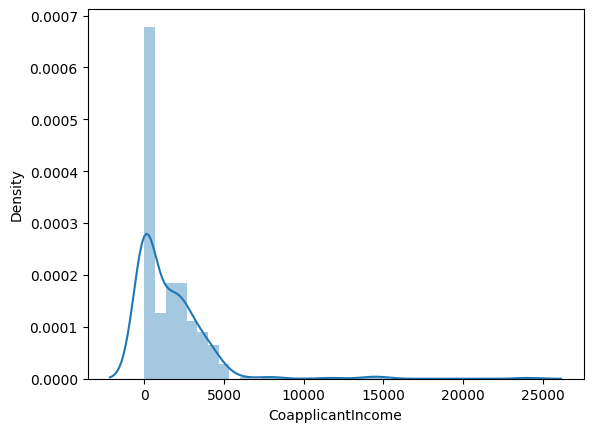

In [5]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [7]:
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q3 = dataset['CoapplicantIncome'].quantile(0.75)
IQR = q3-q1

In [8]:
min_r = q1-(1.5*IQR)
max_r = q3+(1.5*IQR)

In [9]:
min_r, max_r

(-3645.75, 6076.25)

In [10]:
dataset[dataset['CoapplicantIncome']<=max_r]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [12]:
dataset = dataset[dataset['CoapplicantIncome']<=max_r]

C:\Users\hrida\AppData\Local\Temp\ipykernel_12324\3783729653.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


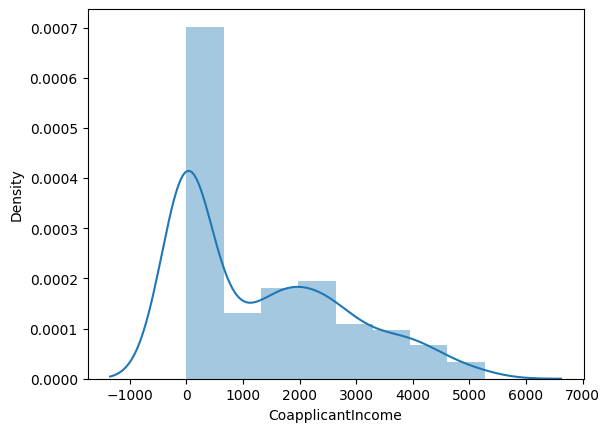

In [13]:
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

In [15]:
from sklearn.preprocessing import FunctionTransformer

In [16]:
ft = FunctionTransformer(func=np.log1p)

In [17]:
ft.fit(dataset[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [19]:
dataset['CoapplicantIncome_tf'] = ft.transform(dataset[['CoapplicantIncome']])
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,CoapplicantIncome_tf
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0.000000
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,7.313887
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,7.496097
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,7.842671
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0.000000


C:\Users\hrida\AppData\Local\Temp\ipykernel_12324\333964796.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])
C:\Users\hrida\AppData\Local\Temp\ipykernel_12324\333964796.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome_tf'])


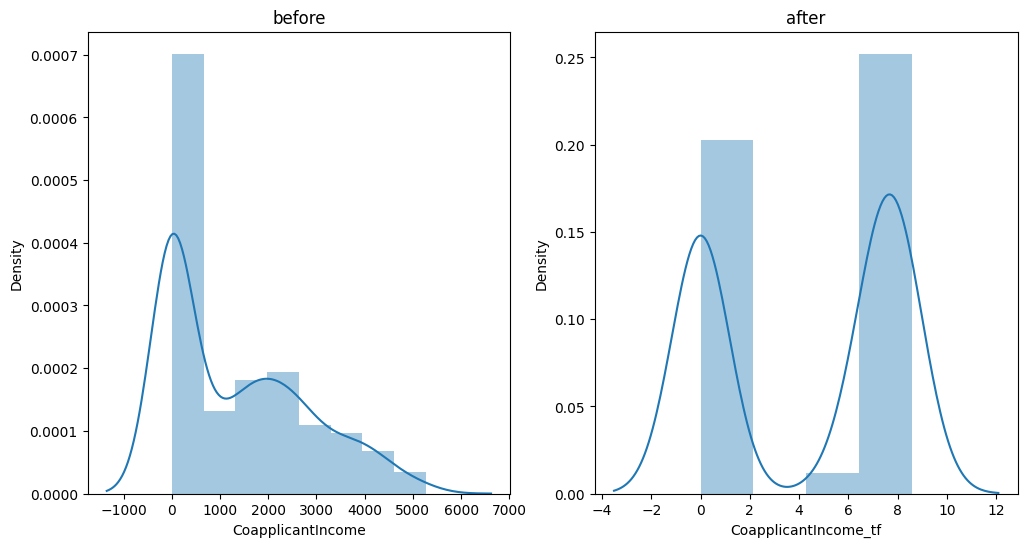

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('before')
sns.distplot(dataset['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('after')
sns.distplot(dataset['CoapplicantIncome_tf'])
plt.show()